<a href="https://colab.research.google.com/github/sielerod/Heart_Failure/blob/master/heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição de Falhas no Coração

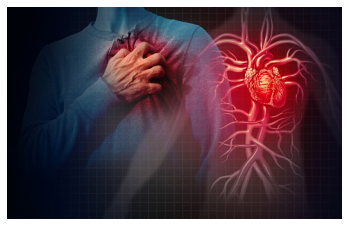

In [ ]:
#@title Fonte de dados
import cv2
import urllib.request
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img_link = 'https://raw.githubusercontent.com/sielerod/Heart_Failure/master/img/Cardio_11.14.19_HeartDiseaseCancer.png'

req = urllib.request.urlopen(img_link)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr,-1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

Fonte:
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data/notebooks

Artigo: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

Breve explicação com o significado das colunas no dataset: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1

## Leitura e Exploração de Dados

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/sielerod/Heart_Failure/master/Data/heart_failure_clinical_records_dataset.csv'
heart_failure = pd.read_csv(url)
heart_failure.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


Como podemos ver abaixo, o dataset não apresenta a necessidade de tratamento de dados nulos, entretanto é um dataset pequeno com apenas 299 amostras; portanto, a qualidade do modelo para aplicação num cenário real é fragilizada. Buscamos por outros datasets com o mesmo tipo de conteúdo, entretanto todos apresentavam o mesmo problema de volumetria dos dados.

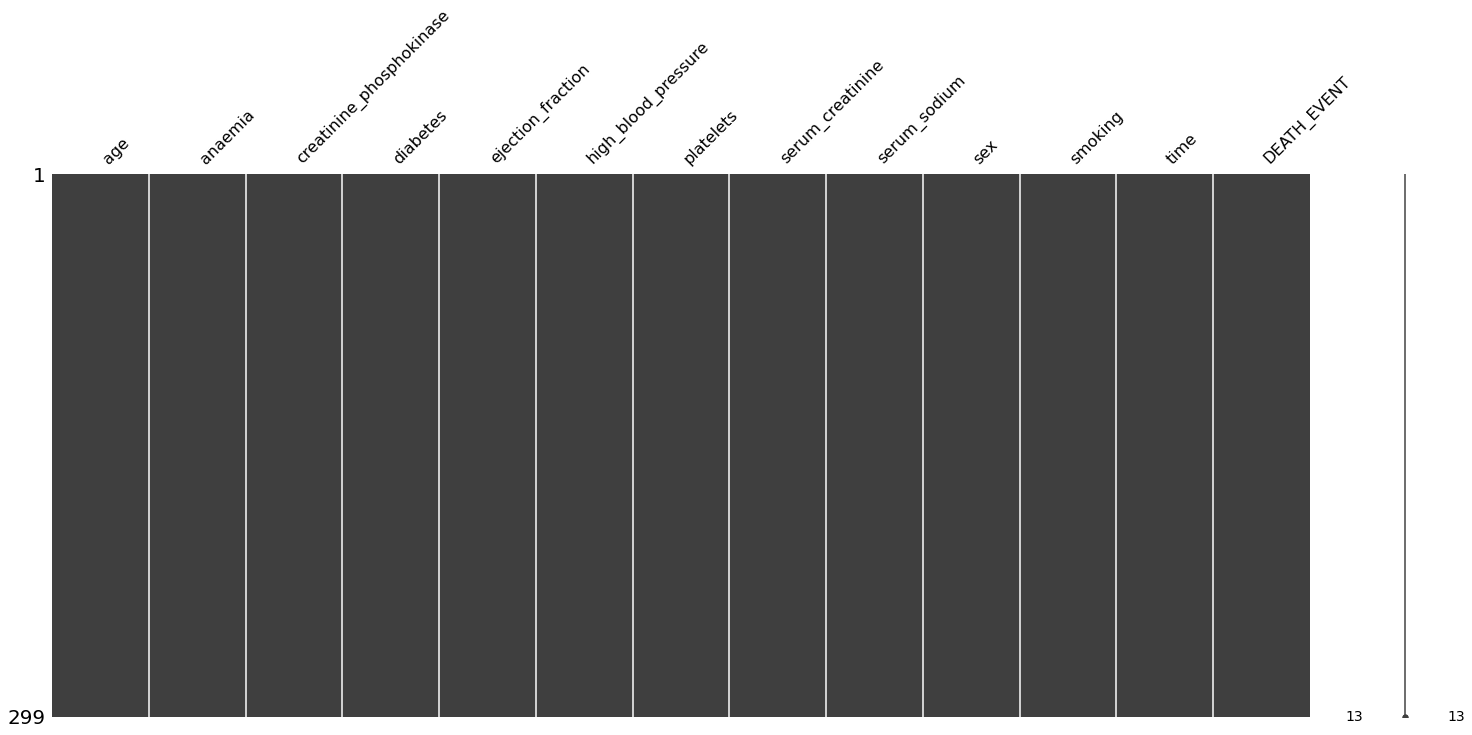

In [ ]:
import missingno as msno 

msno.matrix(heart_failure)

Adicionalmente, podemos verificar abaixo que o dataset é composto por dados contínuos (numéricos)

In [ ]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Como podemos ver abaixo, as informações que compõem o dataset não estão na mesma escala. Portanto, na fase de tratamento dos dados esta informação será normaliza.

In [ ]:
heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
import matplotlib.pyplot as plt
import pandas.util.testing as tm
import seaborn as sns
%matplotlib inline

### Análise da Distribuição dos Dados

Com base nas apresentações abaixo, podemos ver que nenhum dos dados pode-se considerar como uma Distribuição Normal. 

Ainda assim, podemos notar que algumas features se aproximam de uma distribuição normal: Age, Ejection Fraction. 

Por outro lado, alguns dados possuem outliers que geram maior distorção na distribuição dos valores, como: Creatinine Phosphokinase, Serum Creatinine, Platelets e Serum Sodium.

---

Outro fator importante na análise dos dados abaixo é que podemos ver que o quantitativo de mortes (target) não está balanceado, sendo que as pessoas identificadas como falecidas (DEATH_EVENT = 1) correspondem a um menor volume.



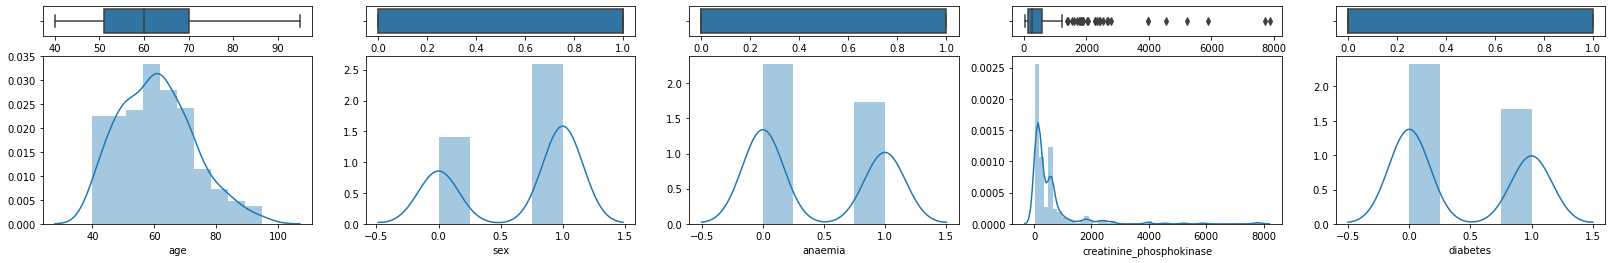

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(28, 4), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(heart_failure['age'], ax=axes[0,0])
sns.distplot(heart_failure['age'], ax=axes[1,0])

sns.boxplot(heart_failure['sex'], ax=axes[0,1])
sns.distplot(heart_failure['sex'], ax=axes[1,1])

sns.boxplot(heart_failure['anaemia'], ax=axes[0,2])
sns.distplot(heart_failure['anaemia'], ax=axes[1,2])

sns.boxplot(heart_failure['creatinine_phosphokinase'], ax=axes[0,3])
sns.distplot(heart_failure['creatinine_phosphokinase'], ax=axes[1,3])

sns.boxplot(heart_failure['diabetes'], ax=axes[0,4])
sns.distplot(heart_failure['diabetes'], ax=axes[1,4])


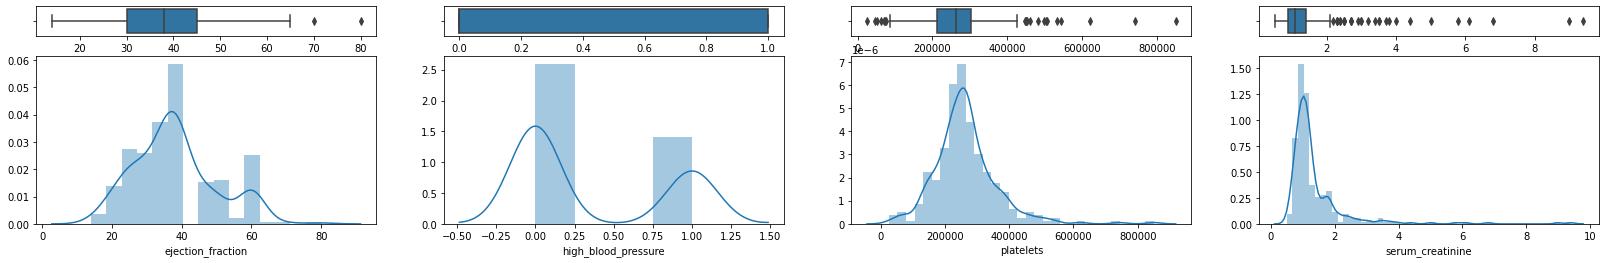

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(28, 4), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(heart_failure['ejection_fraction'], ax=axes[0,0])
sns.distplot(heart_failure['ejection_fraction'], ax=axes[1,0])

sns.boxplot(heart_failure['high_blood_pressure'], ax=axes[0,1])
sns.distplot(heart_failure['high_blood_pressure'], ax=axes[1,1])

sns.boxplot(heart_failure['platelets'], ax=axes[0,2])
sns.distplot(heart_failure['platelets'], ax=axes[1,2])

sns.boxplot(heart_failure['serum_creatinine'], ax=axes[0,3])
sns.distplot(heart_failure['serum_creatinine'], ax=axes[1,3])


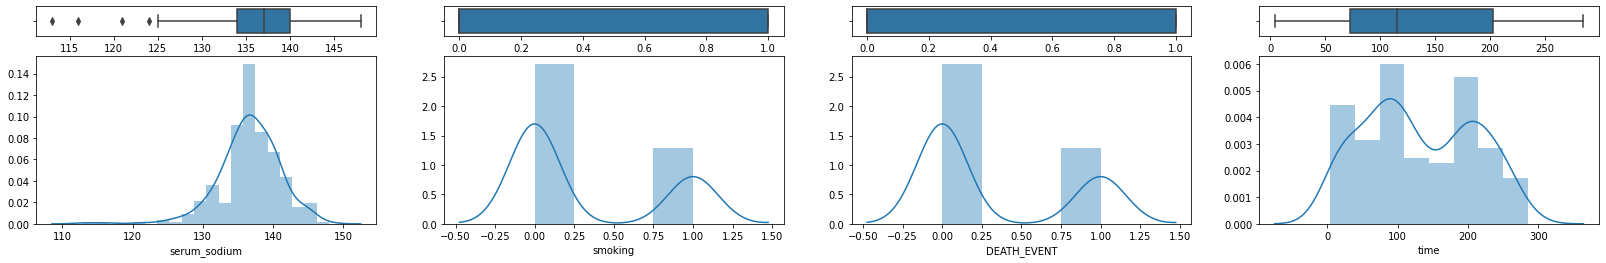

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(28, 4), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(heart_failure['serum_sodium'], ax=axes[0,0])
sns.distplot(heart_failure['serum_sodium'], ax=axes[1,0])

sns.boxplot(heart_failure['smoking'], ax=axes[0,1])
sns.distplot(heart_failure['smoking'], ax=axes[1,1])

sns.boxplot(heart_failure['DEATH_EVENT'], ax=axes[0,2])
sns.distplot(heart_failure['DEATH_EVENT'], ax=axes[1,2])

sns.boxplot(heart_failure['time'], ax=axes[0,3])
sns.distplot(heart_failure['time'], ax=axes[1,3])

### Análise da Distribuição de Dados com a Comparação entre Atributos

In [ ]:
import plotly.express as px

fig = px.histogram(heart_failure, x="age", color="anaemia",
      title='Distribuição de Anemia por Idade',)
fig.show()

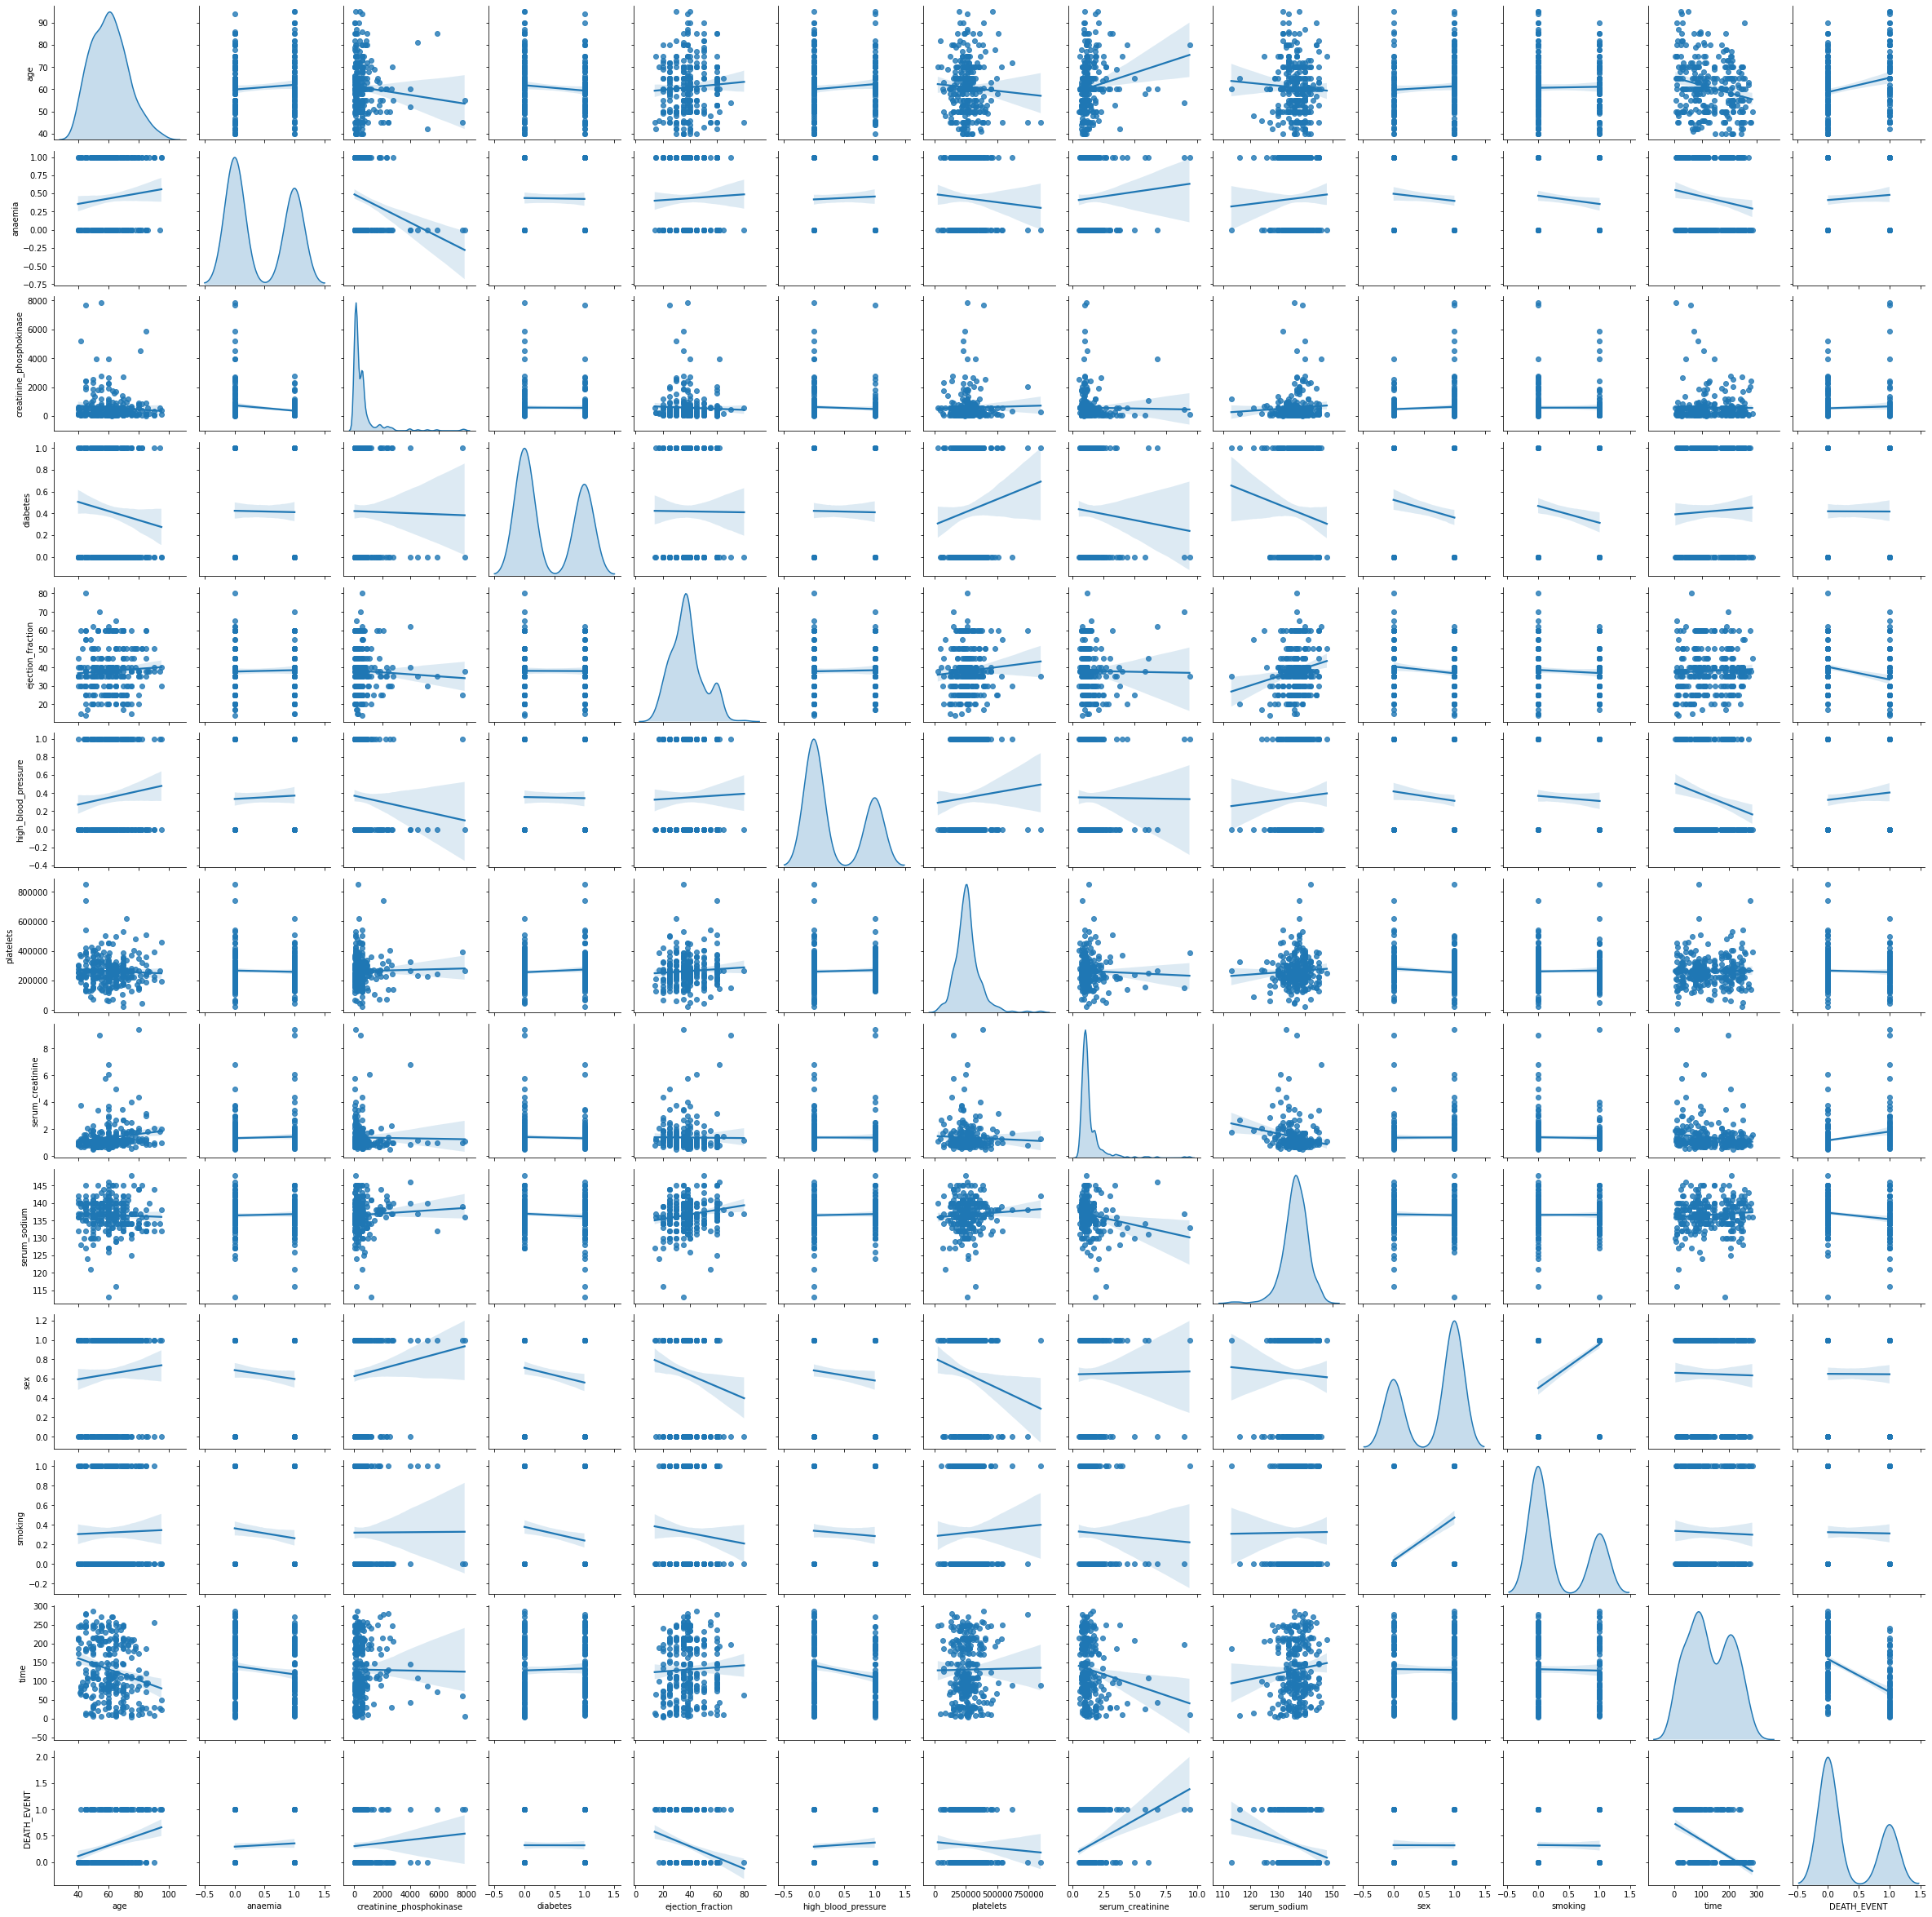

In [ ]:
_ = sns.pairplot(heart_failure, kind='reg', diag_kind='kde')

### Correção entre as Variáveis

Como podemos observar na matrix de correlação, as variáveis listadas abaixo possuem maior correlação com o fator morte, lembrando que **correlação não significa relação de causa e efeito**.

Maior correlação diretamente proporcial ao fator morte:
1.   Creatina sérica (Serum Creatine)
2.   Idade

Maior correlação inversamente proporcial ao fator morte:
3.   Tempo de acompanhamento do paciente (Time)
4.   Fração de Ejeção (Ejection Fraction)



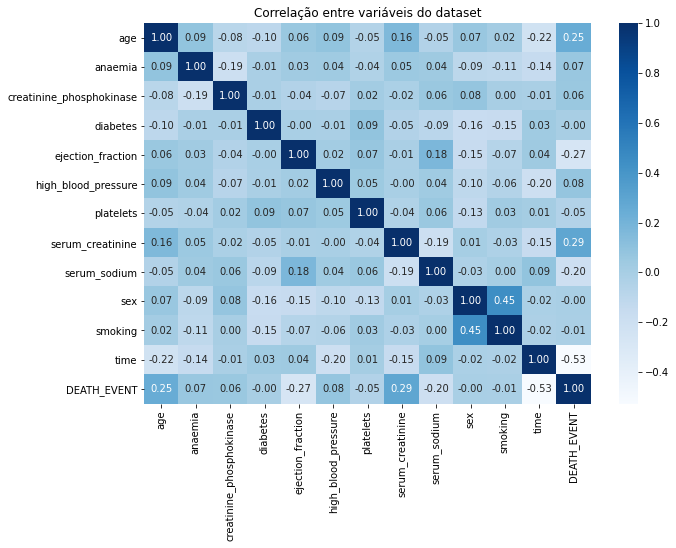

In [ ]:
plt.figure(figsize=(10, 7))
plt.xticks(rotation=45)
sns.heatmap(heart_failure.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

Podemos dizer que a correlação diretamente proporcional entre morte e idade é algo esperado, já que pessoas com maior idade são mais sensíveis a diversos fatores e estão mais propícias a doenças que podem culminar na morte.

Se detalharmos a relação Idade x Morte adicinando a vertente sexo, podemos ver no gráfico abaixo que neste dataset as mulheres (sex=0) morreram mais jovens do que os homens.

Além disto, as mulheres observadas também possuiam uma maior taxa de creatina sérica, o que pode ter contribuído para a maior taxa de mortalidade neste sexo. 

In [ ]:
fig = px.box(heart_failure, y='age', x="DEATH_EVENT", points="all",color="sex")
fig.show()


In [ ]:
fig = px.box(heart_failure, y='ejection_fraction', x="DEATH_EVENT", points="all",color="sex")
fig.show()

## Limpeza e Tratamento de Dados

### Normalização

Aplicação de normalização nas features para adequação dos dados na mesma escala 

In [ ]:
heart_failure_target = heart_failure.DEATH_EVENT
heart_failure_feature = heart_failure.drop(['DEATH_EVENT','time'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(heart_failure_feature.values) # normalizing the features
scaled_features_df = pd.DataFrame(x, index=heart_failure_feature.index, columns=heart_failure_feature.columns)

scaled_features_df.head(4)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682


Validação se dados estão na mesma escala com base no desvio padrão:

In [ ]:
import numpy as np
np.mean(scaled_features_df),np.std(scaled_features_df)

(age                         5.265205e-16
 anaemia                     3.594301e-16
 creatinine_phosphokinase    3.713120e-18
 diabetes                    1.113936e-16
 ejection_fraction           3.341808e-18
 high_blood_pressure        -4.841909e-16
 platelets                   1.009969e-16
 serum_creatinine           -2.227872e-18
 serum_sodium               -8.627435e-16
 sex                        -5.940993e-18
 smoking                    -3.861645e-17
 dtype: float64, age                         1.0
 anaemia                     1.0
 creatinine_phosphokinase    1.0
 diabetes                    1.0
 ejection_fraction           1.0
 high_blood_pressure         1.0
 platelets                   1.0
 serum_creatinine            1.0
 serum_sodium                1.0
 sex                         1.0
 smoking                     1.0
 dtype: float64)

### Redução de Dimensões com Principal component analysis (PCA)

In [ ]:
heart_failure_feature.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1


In [ ]:
from sklearn.decomposition import PCA

pca_heart = PCA(n_components=.80)
principalComponents = pca_heart.fit_transform(scaled_features_df)
principalComponents_df = pd.DataFrame(principalComponents,index =scaled_features_df.index)

principalComponents_df.head(4)

,0,1,2,3,4,5,6,7
0,0.869768,1.462919,1.018310,1.156098,-0.523452,-1.818766,0.066648,-0.270048
1,1.866471,-3.427661,1.223808,2.646201,4.261745,-1.596060,1.848073,2.201242
2,2.521889,0.881022,1.255749,-0.534283,-0.387760,-0.267889,-0.467260,-0.742793
3,0.575683,0.682327,0.592338,-1.690663,0.408138,-0.209260,1.532966,-0.362973


In [ ]:
principalComponents_df.shape
#pesquisar como apresentar nome das variáveis

(299, 8)

## Divisão de Dados de Teste e Treino

In [99]:
#Divisão dos dados em teste e treino
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(principalComponents_df, heart_failure_target , test_size=0.3, random_state=337)


In [ ]:
X_train.shape

(209, 8)

###Divisão dos dados de teste e treino, mantendo o conjunto de treino balanceado com over-sampling


In [ ]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

107 new random picked points


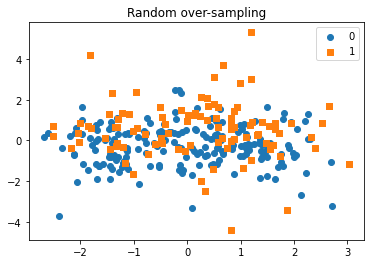

In [90]:
from imblearn.over_sampling import RandomOverSampler
from matplotlib.pyplot import *

X = principalComponents_df
y = heart_failure_target

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X,y)

print(X_ros.shape[0] - principalComponents_df.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [93]:
y_ros.shape

(406,)

## Teste e Comparação de Múltiplos Modelos

Função para criação de vários modelos e apresentação de indicadores de qualidade para viabilizar análise

In [95]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.neural_network import MLPClassifier


def test_machine_learning_classifier(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame, target_names):
    
    dfs = []
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
          ('BNB', BernoulliNB()),
          ('XGB', XGBClassifier()), 
          ('DECT', DecisionTreeClassifier()), 
          ('SGDC', SGDClassifier()), 
          ('NEAC', NearestCentroid()), 
          ('MLPC', MLPClassifier())
        ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']#, 'roc_auc']
    
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        #print(name)
        #print(classification_report(y_test, y_pred))
        results.append(cv_results)
        names.append(name)
    
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)


    final = pd.concat(dfs, ignore_index=True)

    fig = px.box(final, x="model", y="test_recall_weighted")
    fig.show()

    return

**Teste dos Modelos com Dados Desbalanceados**

In [101]:
target = 'DEATH_EVENT'
test_machine_learning_classifier(X_train, y_train, X_test, y_test, target)

**Teste dos Modelos com Dados Balanceados**

In [100]:
X_train_balance, X_test_balance, y_train_balance, y_test_balance = train_test_split(X_ros, y_ros , test_size=0.3, random_state=337)

test_machine_learning_classifier(X_train_balance, y_train_balance, X_test_balance, y_test_balance, target)

**Melhores resultados**

Considerando que há maior relevância na identificação dos pacientes mais propensos à morte (Death = 1), com o intuito de intensificar e melhorar o tratamento deles, a melhor métrica para avaliação dos modelos é o **Recall**.



---


A execução dos modelos sem balanceamento do dataset gerou grande diferença no resultado final do melhor modelo.


---


**Melhores modelos sem balanceamento do dataset**:



1.   Nearest Centroid (mediana do recall: 73,8%)
2.   Regressão Logística (mediana do recall: 73,8%)
3.   SVM (mediana do recall: 73,1%)

---


**Melhores modelos com dataset balanceado**:


1.   Random Forest (mediana do recall: 82,1%)
2.   Decision Tree Classifier (mediana do recall: 78,9%)
3.   XGBoost (mediana do recall: 77,1%)


---


Concluímos que os dados devem estar balanceados para um melhor resultado e o melhor modelo a ser aplicado é Random Forest.



# Explicação sobre Funcionamento de Alguns Modelos

## Naive Bayes (GaussianNB)

Este algoritmo tem como base a análise probabilística condicional do “Teorema de Bayes”, que considera a probabilidade do evento A ocorrer, dado o evento B. Nesta implementação utilizamos o Gaussian, que é usado na classificação e assume uma distribuição normal.

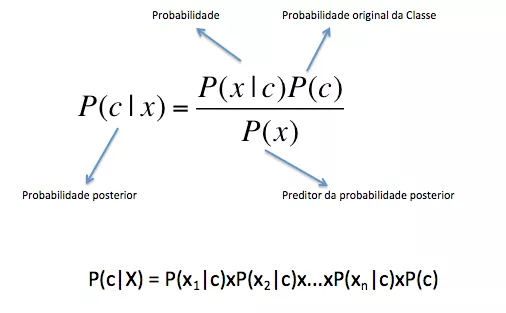


Este algoritmo é popularmente utilizado na classificação de textos, principalmente na identificação de e-mails classificados como SPAM. Esta popularidade ocorreu pela simplicidade e rapidez do algoritmo, bem como os bons resultados mesmo com um volume pequeno de dados.

O algoritmo é considerado como ingênuo (naive) por desconsiderar a correlação entre as variáveis; ou seja, cada variável (feature) é tratada de forma independente.

Assim, é importante que esta análise condicional realizada pelo algoritmo considere atributos que sejam independentes.

**Como Funciona o Naive Bayes?**

No exemplo deste trabalho, temos um conjunto de dados com características de indivíduos, o tempo em que estes indivíduos foram observados, e se eles morreram em decorrência de falhas no sistema cardíaco.

Neste contexto, o Teorema de Bayes foi aplicado para identificar a probabilidade de um indivíduo falecer em decorrência de problemas cardíacos, com base nas características deste indivíduo. Para isto, o algoritmo irá aplicar os seguintes passos no conjunto de treino:


1.   Converter o conjunto de dados em uma tabela de frequência




In [ ]:
heart_failure.groupby('DEATH_EVENT').count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96



2.   Criar a tabela de probabilidade ao encontrar as probabilidades de morte em decorrência de falha cardíaca para cada feature
3.   Aplicar equação Bayesiana Naive para calcular a probabilidade posterior para cada feature. A feature com maior probabilidade posterior é o resultado da previsão.

## MLPClassifier

O MLP (Perceptron Multicamadas) é uma rede neural semelhante a “Perceptron”, porém possui mais camadas de neurônios. Uma rede neural é caracterizada por neurônios artificias que são unidades fundamentais de processamento de informação utilizados em redes dessa característica.
Para essa abordagem, podemos destacar três elementos básicos de um neurônio que são: (conexões de entrada, combinador linear e função de ativação):

1)	As conexões de entrada são ponderadas por um peso relativo. Cada sinal de entrada Xi, é multiplicado pelo peso relativo Wi, e posteriormente é conectado ao neurônio. A entrada tem um valor fixo, diferente de zero, denominada limiar de ativação;
2)	O combinador linear é responsável pela soma dos valores de entrada (x1 * w1  + x2 * w2  +   ... +  xn * wn + ), gerando o potencial de ativação U.
3)	A função de ativação avalia o potencial de ativação U e através de uma função g(u), calcula o sinal de saída do neurônio.

O MLP é um algoritmo de aprendizado de classificadores binários. Ele é capaz de resolver apenas problemas linearmente separáveis. Por meio do processo de treinamento, o algoritmo aprende a classificar as entradas em dois grupos diferentes. O MLP multicamada consiste em três ou mais camadas (uma camada de entrada e uma camada de saída com um ou mais camadas ocultas). 

Uma rede neural aprende através de um processo iterativo de ajuste de seus pesos e o processo de aprendizagem segue a seguinte sequência:
1.      a rede neural é estimulada pelo ambiente de informação;
2.      a estrutura interna da rede é alterada como resultado do estímulo;
3.      devido às alterações que ocorreram em sua estrutura interna, a rede tem modificada sua resposta aos estímulos do ambiente.

Este tipo de aprendizado é caracterizado pela presença de um “professor” externo, que tem a função de fornecer a resposta desejada durante o processo de aprendizado. A diferença entre a resposta desejada e a resposta observada na saída é denominada sinal de erro, e de acordo com esse erro, os parâmetros da rede são ajustados. O objetivo do procedimento de aprendizado por correção de erro é ajustar os parâmetros da rede de modo que a resposta observada se aproxime da resposta desejada.

Esse tipo de abordagem através de multicamadas tem usando um algoritmo “backpropagation”, que é um algoritmo padrão para qualquer aprendizado supervisionado, processo de reconhecimento de padrões e objeto de investigação. Os MLPs são funções de aproximação universal, para que eles possam ser usados para criar modelos matemáticos por análise de regressão. 

Como a classificação é um caso particular de regressão quando a variável resposta é categórica, MLPs também são bons algoritmos classificadores. Os MLPs foram uma solução de aprendizagem de máquina popular na década de 1980, encontrando aplicações em diversos campos, como reconhecimento de voz, reconhecimento de imagem e de tradução automática de software, mas desde a década de 1990 enfrentou forte concorrência e tem sido menos utilizado para esses fins.

In [ ]:
#Gráficos com Modelos: NearestCentroid, LogReg,  MLPClassifier

# GNB (72%): Jessiele
# MLPClassifier (70%): Clayton

## Regressão Logística

O modelo de Regressão Logística é um dos modelos mais utilizado para classificação binária (0 e 1). Modelo este muito conhecido devido ao gráfico que é gerado de uma probabilidade. O número da saída da função logística, é um número entre 0 e 1. Quando se gera uma plotagem no modelo de Regressão Logística, é possível definir se algo (amostra) pertence ou não pertence à uma determinada classe.

Esse modelo calcula a soma ponderada dos atributos de entrada. Porém, em sua saída ele aplica a função logística (função Sigmoide).



Após o modelo estimar a probabilidade aplica-se a regra abaixo, ou seja, se o resultado for menor do que 0.5 (50% de probabilidade) significa que não pertence a uma determinada classe e, se ele for maior ou igual a 0.5 (50%) significa que ele pertence a uma determinada classe.
 

Essa função pode ser utilizá-la na parte de redes neurais para classificação de uma determinada amostra. As análises são realizadas tendo em vista as Fronteira Decisão da classificação de pertencer ou não pertencer à uma determinada classe.